# Test OCR with pytesseract

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

from pathlib import Path

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

try:
    from PIL import Image, ImageDraw
except ImportError:
    import Image
import pytesseract

import matplotlib.pyplot as plt


# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

%matplotlib inline

## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

**Next two lines are for pretty output for all prints in a Pandas cell, not just the last.**

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

JPEG L (700, 921) None


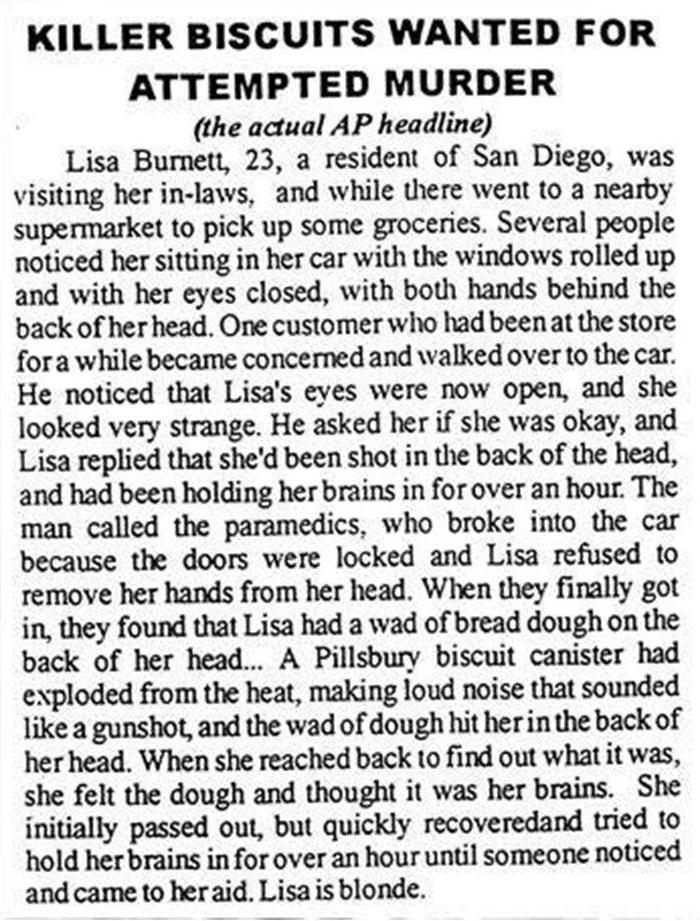

In [5]:
imPath = Path.cwd() / 'images'
imFile00 = 'KillerBiscuits.jpg'
path00 = imPath / imFile00
thumbPath00 = imPath / imFile00.replace('.', '-.')
image00 = Image.open(path00)
print(image00.format, image00.mode, image00.size, image00.palette)
display(image00)

None L (700, 921) None


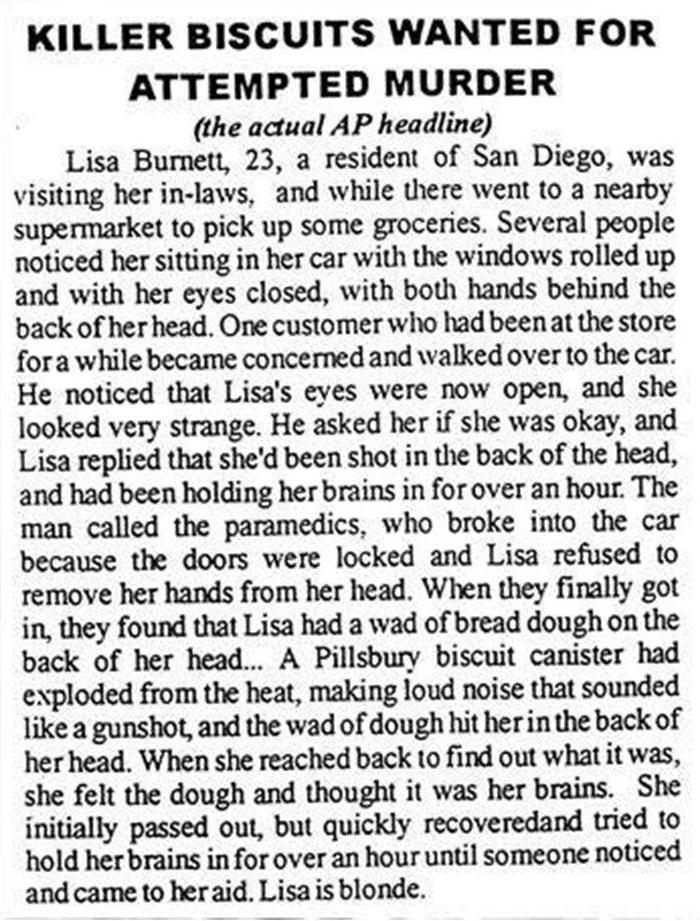

In [6]:
thumb00 = image00.copy()
thumb00.thumbnail((1000, 10000))
thumb00.save(thumbPath00)
print(thumb00.format, thumb00.mode, thumb00.size, thumb00.palette)
display(thumb00)

In [11]:
help(image00)

Help on JpegImageFile in module PIL.JpegImagePlugin object:

class JpegImageFile(PIL.ImageFile.ImageFile)
 |  Base class for image file format handlers.
 |  
 |  Method resolution order:
 |      JpegImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draft(self, mode, size)
 |      Configures the image file loader so it returns a version of the
 |      image that as closely as possible matches the given mode and
 |      size. For example, you can use this method to convert a color
 |      JPEG to greyscale while loading it.
 |      
 |      If any changes are made, returns a tuple with the chosen ``mode`` and
 |      ``box`` with coordinates of the original image within the altered one.
 |      
 |      Note that this method modifies the :py:class:`~PIL.Image.Image` object
 |      in place. If the image has already been loaded, this method has no
 |      effect.
 |      
 |      Note: This method is not imple

In [7]:
data00 = pytesseract.image_to_data(image00).split('\n')
df00 = pd.DataFrame([x.split('\t') for x in data00[1:]], columns=data00[0].split('\t'))
df00.head(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,700,921,-1,
1,2,1,1,0,0,0,28,19,628,33,-1,
2,3,1,1,1,0,0,28,19,628,33,-1,
3,4,1,1,1,1,0,28,19,628,33,-1,
4,5,1,1,1,1,1,28,23,145,29,96,KILLER
5,5,1,1,1,1,2,188,19,186,31,96,BISCUITS
6,5,1,1,1,1,3,388,19,172,27,96,WANTED
7,5,1,1,1,1,4,576,19,80,28,96,FOR
8,2,1,2,0,0,0,14,69,669,835,-1,
9,3,1,2,1,0,0,129,69,427,73,-1,


In [8]:
df00.info()
cols = df00.columns
print(cols)
for col in cols[:-1]:
    df00[col] = df00[col].astype(int)
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      277 non-null    object
 1   page_num   277 non-null    object
 2   block_num  277 non-null    object
 3   par_num    277 non-null    object
 4   line_num   277 non-null    object
 5   word_num   277 non-null    object
 6   left       277 non-null    object
 7   top        277 non-null    object
 8   width      277 non-null    object
 9   height     277 non-null    object
 10  conf       277 non-null    object
 11  text       277 non-null    object
dtypes: object(12)
memory usage: 26.1+ KB
Index(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf', 'text'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  --

In [9]:
df00.loc[df00.conf == -1, 'conf'] = pd.NA
df00.head(10)
df00 = df00[~df00.conf.isna()].reset_index()
df00.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,700,921,<NA>,
1,2,1,1,0,0,0,28,19,628,33,<NA>,
2,3,1,1,1,0,0,28,19,628,33,<NA>,
3,4,1,1,1,1,0,28,19,628,33,<NA>,
4,5,1,1,1,1,1,28,23,145,29,96,KILLER
5,5,1,1,1,1,2,188,19,186,31,96,BISCUITS
6,5,1,1,1,1,3,388,19,172,27,96,WANTED
7,5,1,1,1,1,4,576,19,80,28,96,FOR
8,2,1,2,0,0,0,14,69,669,835,<NA>,
9,3,1,2,1,0,0,129,69,427,73,<NA>,


,index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,4,5,1,1,1,1,1,28,23,145,29,96,KILLER
1,5,5,1,1,1,1,2,188,19,186,31,96,BISCUITS
2,6,5,1,1,1,1,3,388,19,172,27,96,WANTED
3,7,5,1,1,1,1,4,576,19,80,28,96,FOR
4,11,5,1,2,1,1,1,129,71,240,30,96,ATTEMPTED
5,12,5,1,2,1,1,2,385,69,171,28,96,MURDER
6,14,5,1,2,1,2,1,194,115,48,27,96,(the
7,15,5,1,2,1,2,2,249,114,76,22,96,actual
8,16,5,1,2,1,2,3,330,113,43,23,96,AP
9,17,5,1,2,1,2,4,378,111,114,27,96,headline)


,index,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,4,5,1,1,1,1,1,28,23,145,29,96,KILLER
1,5,5,1,1,1,1,2,188,19,186,31,96,BISCUITS
2,6,5,1,1,1,1,3,388,19,172,27,96,WANTED
3,7,5,1,1,1,1,4,576,19,80,28,96,FOR
4,11,5,1,2,1,1,1,129,71,240,30,96,ATTEMPTED
5,12,5,1,2,1,1,2,385,69,171,28,96,MURDER
6,14,5,1,2,1,2,1,194,115,48,27,96,(the
7,15,5,1,2,1,2,2,249,114,76,22,96,actual
8,16,5,1,2,1,2,3,330,113,43,23,96,AP
9,17,5,1,2,1,2,4,378,111,114,27,96,headline)


Help on method rectangle in module PIL.ImageDraw:

rectangle(xy, fill=None, outline=None, width=1) method of PIL.ImageDraw.ImageDraw instance
    Draw a rectangle.

[(28, 23), (173, 52)]


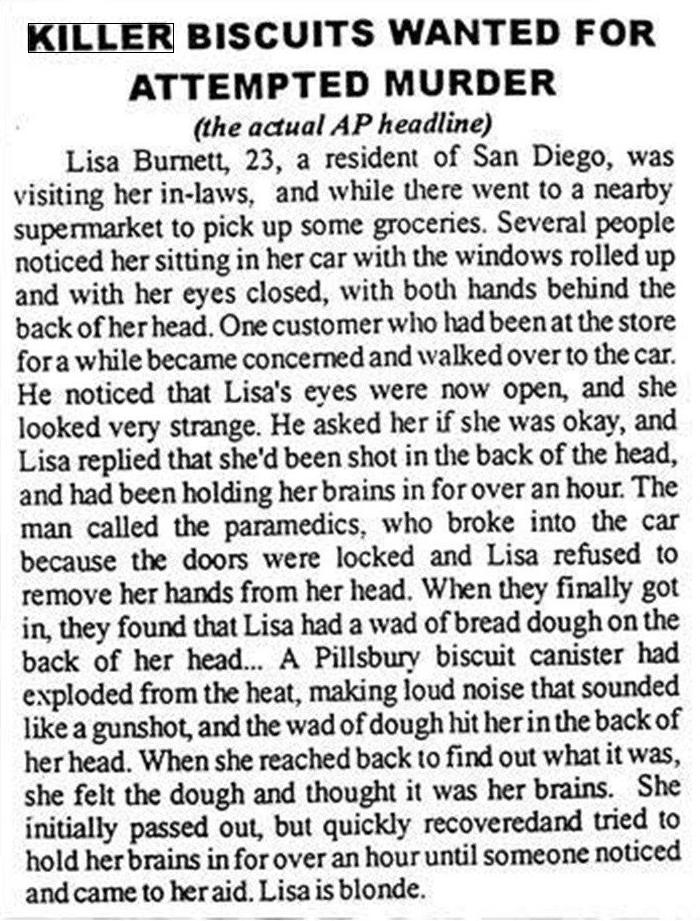

In [10]:
copy00 = image00.copy()
draw00 = ImageDraw.Draw(copy00)
df00.head(10)
help(draw00.rectangle)
xy = [(df00.loc[0, 'left'], df00.loc[0, 'top']),
      (df00.loc[0, 'left'] + df00.loc[0, 'width'], df00.loc[0, 'top'] + df00.loc[0, 'height'])]
print(xy)
draw00.rectangle(xy, fill=None)
display(copy00)

In [13]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [12]:
print(pytesseract.image_to_string(image00))

KILLER BISCUITS WANTED FOR

ATTEMPTED MURDER
(the actual AP headline)

Lisa Burnett, 23, a resident of San Diego, was
visiting her in-laws, and while there went to a nearby
supermarket to pick up some groceries. Several people
noticed her sitting in her car with the windows rolled up
and with her eyes closed, with both hands behind the
back of her head. One customer who had beenat the store
fora while became concerned and walked over to the car.
He noticed that Lisa's eyes were now open, and she
looked very strange. He asked her if she was okay, and
Lisa replied that she'd been shot in the back of the head,
and had been holding her brains in for over an hour. The
man called the paramedics, who broke into the car
because the doors were locked and Lisa refused to
remove her hands from her head. When they finally got
in, they found that Lisa had a wad of bread dough on the
back of her head... A Pillsbury biscuit canister had
exploded from the heat, making loud noise that sounded
like a gu

In [ ]:
imFile01 = 'NewspaperArticleLoveAmongTheRows.jpg'
path01 = imPath / imFile01
thumbPath01 = imPath / imFile01.replace('.', '-.')
image01 = pil.Image.open(path01)
print(image01.format, image01.mode, image01.size, image01.palette)
display(image01)

In [ ]:
thumb01 = image01.copy()
thumb01.thumbnail((1000, 10000))
thumb01.save(thumbPath01)
print(thumb01.format, thumb01.mode, thumb01.size, thumb01.palette)
display(thumb01)

In [ ]:
print(pytesseract.image_to_string(image01))

In [ ]:
imFile02 = 'StudiesAtSmallestScaleNobelPrizes.jpg'
path02 = imPath / imFile02
thumbPath02 = imPath / imFile02.replace('.', '-.')
image02 = pil.Image.open(path02)
print(image02.format, image02.mode, image02.size, image02.palette)
display(image02)

In [ ]:
thumb02 = image02.copy()
thumb02.thumbnail((1000, 10000))
thumb02.save(thumbPath02)
print(thumb02.format, thumb02.mode, thumb02.size, thumb02.palette)
display(thumb02)

In [ ]:
print(pytesseract.image_to_string(image02))